<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/3_rnn_energydata_multvariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)

In [32]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/gdrive')

import fileinput
filePath ="/content/gdrive/MyDrive/neural_data/energydata_complete.csv"

import pandas as pd
df = pd.read_csv(filePath,index_col='date',infer_datetime_format=True)

df.head(3)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-32-1c7603aeece0>:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(filePath,index_col='date',infer_datetime_format=True)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<Axes: xlabel='date'>

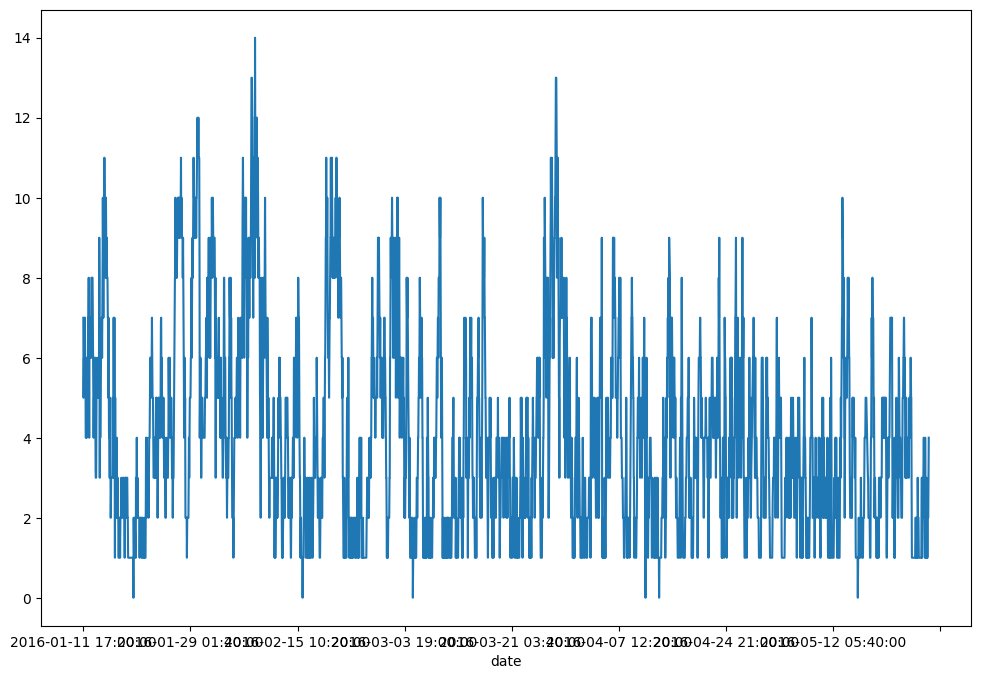

In [34]:
df['Windspeed'].plot(figsize=(12,8))

<Axes: xlabel='date'>

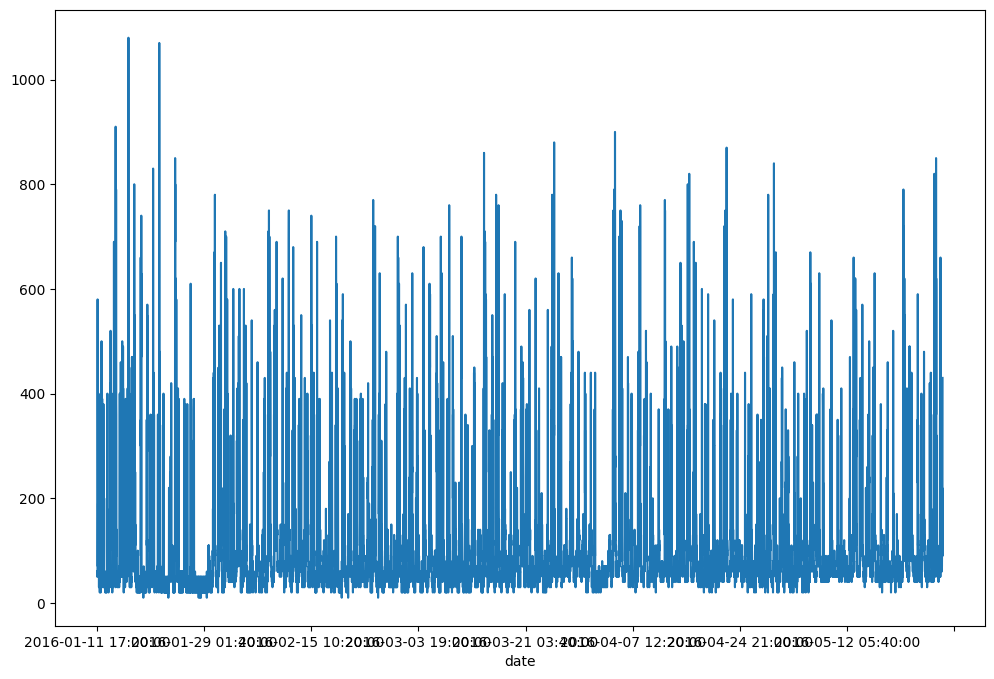

In [35]:
df['Appliances'].plot(figsize=(12,8))

## Train Test Split

In [36]:
# data is monthly, do forest for 1.5 years into the future
len(df)


19735

In [37]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [38]:
df = df.loc['2016-05-01':]

In [39]:
df = df.round(2)

In [40]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [41]:
test_days = 2
test_ind = test_days*144
test_ind

288

In [42]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [43]:
train.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.4,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.5,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.5,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81


In [44]:
test.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.5,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.0,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.5,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.0,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.5,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.0,34.50,7.45,4.40,4.40


## Scale Data

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
scaler.fit(train)

MinMaxScaler()

In [47]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

In [48]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [63]:
# What does the first batch look like?
X,y = generator[0]

In [64]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [65]:
len(scaled_train)

3565

In [66]:
len(generator)

3421

## Create the Model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [68]:
scaled_train.shape

(3565, 28)

In [57]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54428 (212.61 KB)
Trainable params: 54428 (212.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=batch_size)

In [72]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [73]:
# fit model
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


<ipython-input-73-f5190a41c40b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


3421/3421 [==============================] - 293s 85ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 2/10
3421/3421 [==============================] - 288s 84ms/step - loss: 0.0079 - val_loss: 0.0090
Epoch 3/10
3421/3421 [==============================] - 286s 84ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 4/10
3421/3421 [==============================] - 290s 85ms/step - loss: 0.0074 - val_loss: 0.0084


In [74]:
losses = pd.DataFrame(model.history.history)

<Axes: >

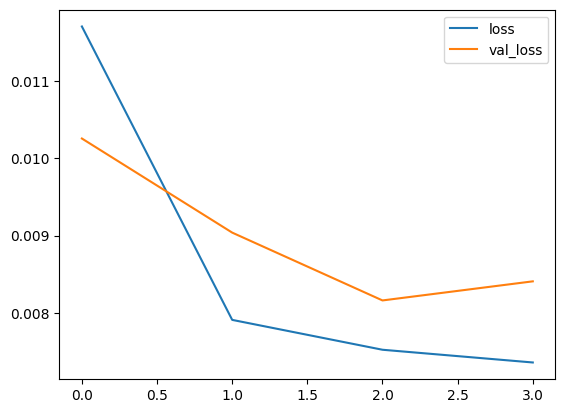

In [75]:
losses.plot()

## Evaluate on Test Data

In [76]:
first_eval_batch = scaled_train[-length:]

In [77]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [78]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [79]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 518ms/step


array([[ 0.10539013,  0.06430291,  0.6842527 ,  0.3873724 ,  0.53972095,
         0.45133436,  0.42860952,  0.38347638,  0.7011742 ,  0.38931048,
         0.3180073 ,  0.37721205,  0.657524  , -0.00154298,  0.6163306 ,
         0.3966498 ,  0.5006149 ,  0.3095626 ,  0.5264578 ,  0.36874726,
         0.62352675,  0.49217206,  0.42553622,  0.1662322 ,  0.5693495 ,
         0.57734984,  0.5118649 ,  0.5049088 ]], dtype=float32)

In [80]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [81]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 48ms/step


In [84]:
true_predictions = scaler.inverse_transform(test_predictions)

In [85]:
true_predictions

array([[101.15040123,   1.92908719,  24.40656323, ...,   8.35721232,
         25.58788908,  25.24029274],
       [ 91.69841379,   2.76078455,  24.37228031, ...,   8.83749574,
         25.79051263,  25.29112585],
       [ 84.55610976,   3.27740438,  24.33589636, ...,   9.30839296,
         25.70546018,  25.23851759],
       ...,
       [-18.73483676,  -7.30850413,  24.53538248, ...,  22.17473009,
         37.74397382,  35.65657595],
       [-19.36090406,  -7.2918056 ,  24.59559915, ...,  22.17968206,
         37.79267138,  35.66804594],
       [-19.9921174 ,  -7.274618  ,  24.65547853, ...,  22.1820412 ,
         37.8413749 ,  35.67992397]])

In [86]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [87]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,101.150401,1.929087,24.406563,37.730847,24.120320,35.638374,25.160272,36.025373,24.108219,37.300403,...,21.942872,37.848128,16.914053,755.321523,56.340752,1.662322,39.160972,8.357212,25.587889,25.240293
1,91.698414,2.760785,24.372280,37.588512,24.053071,35.881254,25.139593,35.649881,24.029014,36.932414,...,21.944056,38.096402,16.980214,754.957496,57.983782,1.271216,38.931636,8.837496,25.790513,25.291126
2,84.556110,3.277404,24.335896,37.377322,23.963912,35.975572,25.135628,35.278215,23.960156,36.663877,...,21.944299,38.365691,17.064394,754.575869,59.436697,0.804569,38.458841,9.308393,25.705460,25.238518
3,77.603136,3.586891,24.302940,37.203010,23.906858,36.014035,25.147344,34.944671,23.916079,36.426974,...,21.952637,38.677870,17.180460,754.261396,60.792500,0.317701,38.078260,9.774846,25.576157,25.149519
4,70.695451,3.737040,24.269276,37.038787,23.876806,35.990165,25.170525,34.633091,23.886893,36.183555,...,21.962496,39.007652,17.308550,753.994002,62.007447,-0.179180,37.708352,10.211263,25.410177,25.017589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-17.502162,-7.340523,24.414299,65.084711,16.758988,80.487629,22.199393,44.323527,23.557657,61.957608,...,23.820165,68.331089,-3.675689,754.967317,213.823441,-1.118625,-54.352558,22.157308,37.646844,35.634938
284,-18.114868,-7.324736,24.474919,64.993250,16.820997,80.424579,22.242726,44.350926,23.635257,61.943969,...,23.854683,68.294197,-3.635350,754.937793,213.570216,-1.103182,-53.752837,22.167250,37.695351,35.645538
285,-18.734837,-7.308504,24.535382,64.903041,16.882353,80.362351,22.286367,44.380210,23.712529,61.930157,...,23.889021,68.255174,-3.595458,754.905300,213.311030,-1.088296,-53.136873,22.174730,37.743974,35.656576
286,-19.360904,-7.291806,24.595599,64.814184,16.942973,80.300949,22.330268,44.411383,23.789379,61.916145,...,23.923141,68.213915,-3.556106,754.869812,213.045956,-1.073964,-52.504501,22.179682,37.792671,35.668046
